In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


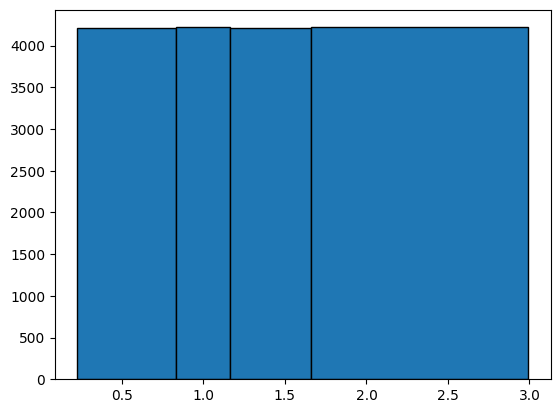

In [ ]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

table = Table.read('/content/drive/MyDrive/Hands on Sessions/HoS3/3DHST_Allfields.fits')


plt.hist(table['z_best'], bins=np.percentile(table['z_best'], [0,25,50,75,100]), edgecolor='black')
plt.show()

In [ ]:
bin_edges = np.percentile(table['z_best'], [0, 25, 50, 75, 100])

print("I valori di redshift che limitano i 4 bin sono:")
print(f"Bordo 0 (min, 0%):   {bin_edges[0]}")
print(f"Bordo 1 (25%):      {bin_edges[1]}")
print(f"Bordo 2 (mediana, 50%): {bin_edges[2]}")
print(f"Bordo 3 (75%):      {bin_edges[3]}")
print(f"Bordo 4 (max, 100%):  {bin_edges[4]}")


I valori di redshift che limitano i 4 bin sono:
Bordo 0 (min, 0%):   0.22689999639987946
Bordo 1 (25%):      0.8294199705123901
Bordo 2 (mediana, 50%): 1.164199948310852
Bordo 3 (75%):      1.6591299772262573
Bordo 4 (max, 100%):  2.9928300380706787


In [ ]:
print(table[1].columns)

<TableColumns names=('id','fieldnr','field','ra','dec','m_F140W','z_best','z_best_l68','z_best_u68','ltau','lage','Av','lmass','lsfr','UmV','VmJ')>


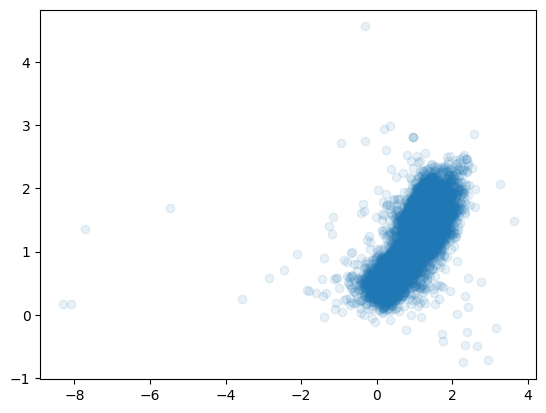

In [ ]:
plt.scatter(table['VmJ'], table['UmV'], alpha=0.1)
plt.show()

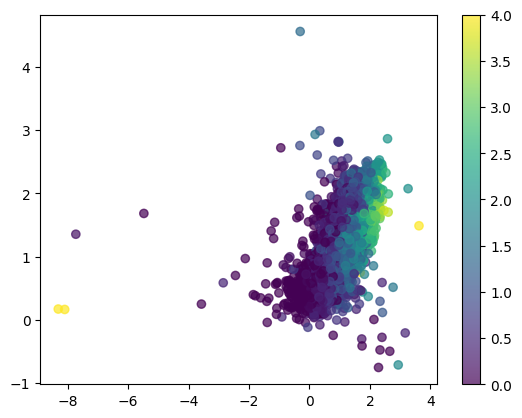

In [ ]:
plt.scatter(table['VmJ'], table['UmV'], c=table['Av'], alpha=0.7)
plt.colorbar()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

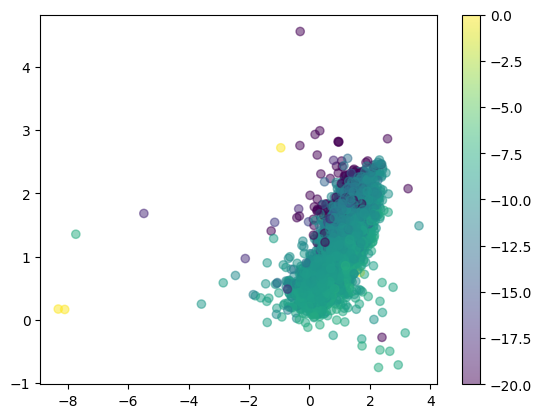

In [ ]:
sSFR = table['lsfr'] - table['lmass']
plt.scatter(table['VmJ'], table['UmV'], c=sSFR, alpha=0.5, vmin=-20, vmax=0)
plt.colorbar()
plt

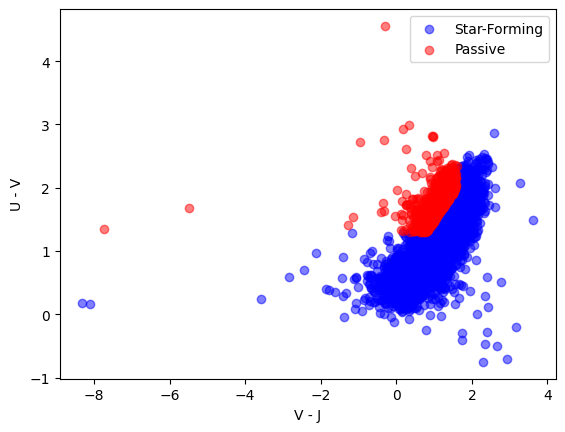

In [ ]:
passive_mask = ((table['UmV'] > 0.88 * table['VmJ'] + 0.59) & (table['UmV'] > 1.3) & (table['VmJ'] < 1.6))
active_mask = ~passive_mask

active = table[active_mask]
passive = table[passive_mask]


plt.scatter(active['VmJ'], active['UmV'],
            alpha=0.5, c='blue', label='Star-Forming')
plt.scatter(passive['VmJ'], passive['UmV'],
            alpha=0.5, c='red', label='Passive')

plt.xlabel('V - J')
plt.ylabel('U - V')
plt.legend()


plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-261354921.py:36: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


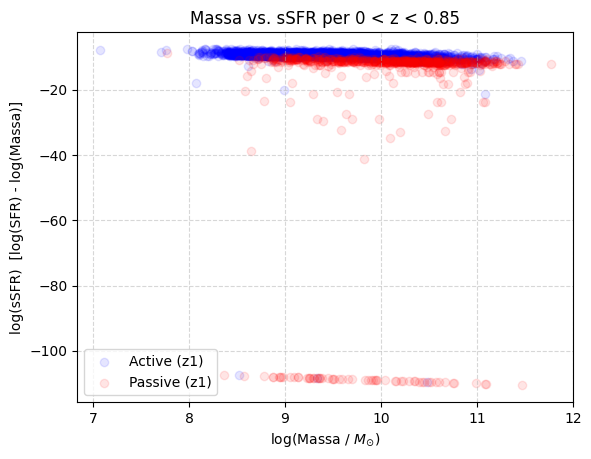

In [ ]:
# z1 = ((table['z_best'] > 0) & (table['z_best'] < 0.85))
# z2 = ((table['z_best'] > 0.85) & (table['z_best'] < 1.2))
# z3 = ((table['z_best'] > 1.2) & (table['z_best'] < 1.8))
# z4 = ((table['z_best'] > 1.8) & (table['z_best'] < 3.1))

z1 = ((table['z_best'] >= np.percentile(table['z_best'], 0)) & (table['z_best'] < np.percentile(table['z_best'], 25)))
z2 = ((table['z_best'] >= np.percentile(table['z_best'], 25)) & (table['z_best'] < np.percentile(table['z_best'], 50)))
z3 = ((table['z_best'] >= np.percentile(table['z_best'], 50)) & (table['z_best'] < np.percentile(table['z_best'], 75)))
z4 = ((table['z_best'] >= np.percentile(table['z_best'], 75)) & (table['z_best'] <= np.percentile(table['z_best'], 100)))

z_labels = [
    '0 < z < 0.85',
    '0.85 < z < 1.2',
    '1.2 < z < 1.8',
    '1.8 < z < 3.1'
]

active_in_z1 = active_mask & z1
passive_in_z1 = passive_mask & z1

lmass_active_z1 = table['lmass'][active_in_z1]
lsfr_active_z1 = table['lsfr'][active_in_z1]
lssfr_active_z1 = lsfr_active_z1 - lmass_active_z1

lmass_passive_z1 = table['lmass'][passive_in_z1]
lsfr_passive_z1 = table['lsfr'][passive_in_z1]
lssfr_passive_z1 = lsfr_passive_z1 - lmass_passive_z1

plt.scatter(lmass_active_z1, lssfr_active_z1,
            c='blue', alpha=0.1, label='Active (z1)')

plt.scatter(lmass_passive_z1, lssfr_passive_z1,
            c='red', alpha=0.1, label='Passive (z1)')


plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.title(f'Massa vs. sSFR per {z_labels[0]}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2403792439.py:19: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


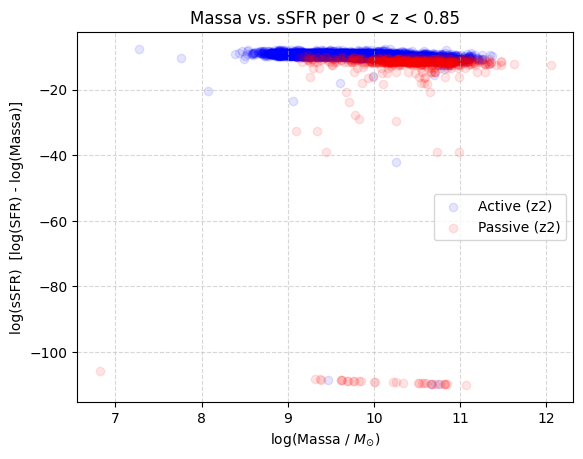

In [ ]:
active_in_z2 = active_mask & z2
passive_in_z2 = passive_mask & z2

lmass_active_z2 = table['lmass'][active_in_z2]
lsfr_active_z2 = table['lsfr'][active_in_z2]
lssfr_active_z2 = lsfr_active_z2 - lmass_active_z2

lmass_passive_z2 = table['lmass'][passive_in_z2]
lsfr_passive_z2 = table['lsfr'][passive_in_z2]
lssfr_passive_z2 = lsfr_passive_z2 - lmass_passive_z2

plt.scatter(lmass_active_z2, lssfr_active_z2,
            c='blue', alpha=0.1, label='Active (z2)')

plt.scatter(lmass_passive_z2, lssfr_passive_z2,
            c='red', alpha=0.1, label='Passive (z2)')


plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.title(f'Massa vs. sSFR per {z_labels[0]}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-410419834.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


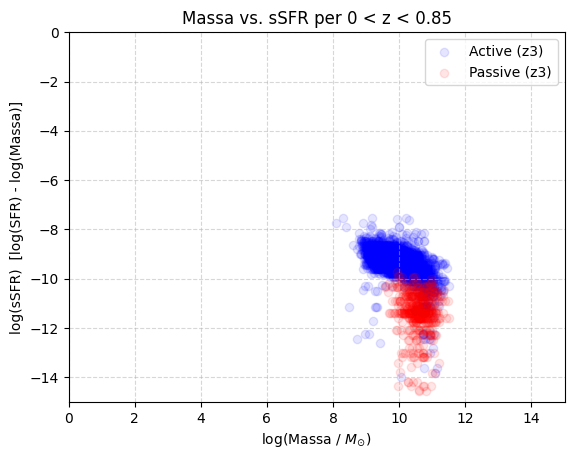

In [ ]:
active_in_z3 = active_mask & z3
passive_in_z3 = passive_mask & z3

lmass_active_z3 = table['lmass'][active_in_z3]
lsfr_active_z3 = table['lsfr'][active_in_z3]
lssfr_active_z3 = lsfr_active_z3 - lmass_active_z3

lmass_passive_z3 = table['lmass'][passive_in_z3]
lsfr_passive_z3 = table['lsfr'][passive_in_z3]
lssfr_passive_z3 = lsfr_passive_z3 - lmass_passive_z3

plt.scatter(lmass_active_z3, lssfr_active_z3,
            c='blue', alpha=0.1, label='Active (z3)')

plt.scatter(lmass_passive_z3, lssfr_passive_z3,
            c='red', alpha=0.1, label='Passive (z3)')

plt.xlim(0,15)
plt.ylim(-15,0)
plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.title(f'Massa vs. sSFR per {z_labels[0]}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-4014939539.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


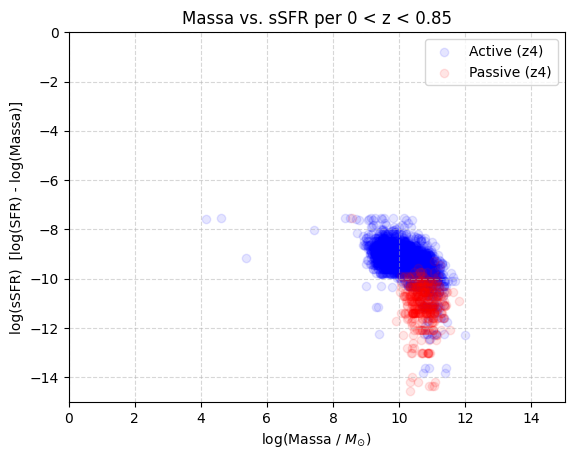

In [ ]:
active_in_z4 = active_mask & z4
passive_in_z4 = passive_mask & z4

lmass_active_z4 = table['lmass'][active_in_z4]
lsfr_active_z4 = table['lsfr'][active_in_z4]
lssfr_active_z4 = lsfr_active_z4 - lmass_active_z4

lmass_passive_z4 = table['lmass'][passive_in_z4]
lsfr_passive_z4 = table['lsfr'][passive_in_z4]
lssfr_passive_z4 = lsfr_passive_z4 - lmass_passive_z4

plt.scatter(lmass_active_z4, lssfr_active_z4,
            c='blue', alpha=0.1, label='Active (z4)')

plt.scatter(lmass_passive_z4, lssfr_passive_z4,
            c='red', alpha=0.1, label='Passive (z4)')

plt.xlim(0,15)
plt.ylim(-15,0)
plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.title(f'Massa vs. sSFR per {z_labels[0]}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

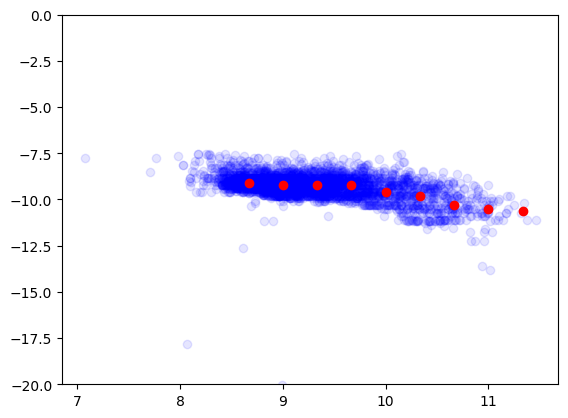

In [ ]:
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit

mass_bin_edges = np.linspace(8.5, 11.5, 10)

median_sfr, bin_edges, binnumber = binned_statistic(lmass_active_z1, lssfr_active_z1, statistic='median', bins = mass_bin_edges)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


plt.ylim(-20,0)
plt.scatter(lmass_active_z1, lssfr_active_z1,
            c='blue', alpha=0.1, label='Active (z1)')

plt.plot(bin_centers, median_sfr, 'o', color='red', label='Median')

plt.show()


In [ ]:
def linear_func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_func, bin_centers, median_sfr)

m_fit = popt[0]
b_fit = popt[1]

print(f"Slope: {m_fit}")
print(f"Intercept: {b_fit}")

Slope: -0.6449997367855247
Intercept: -3.2794468180374947


<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3587083864.py:28: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)', fontsize=12)


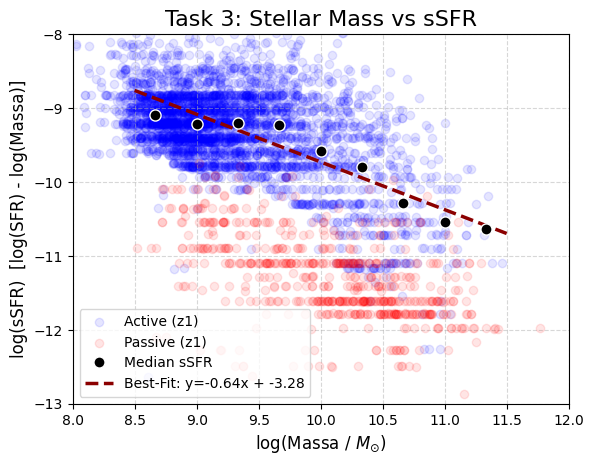

In [ ]:
x_line = np.linspace(8.5, 11.5, 100)
y_line = linear_func(x_line, m_fit, b_fit)

plt.xlim(8, 12)
plt.ylim(-13, -8)

plt.scatter(lmass_active_z1, lssfr_active_z1,
            c='blue', alpha=0.1, label='Active (z1)', zorder=1)

plt.scatter(lmass_passive_z1, lssfr_passive_z1,
            c='red', alpha=0.1, label='Passive (z1)', zorder=2)

plt.plot(bin_centers, median_sfr, 'o',
         color='black',
         markersize=8,
         markeredgecolor='white',
         label='Median sSFR',
         zorder=4)

plt.plot(x_line, y_line,
         color='darkred',
         linestyle='--',
         linewidth=2.5,
         label=f'Best-Fit: y={m_fit:.2f}x + {b_fit:.2f}',
         zorder=3)

plt.title('Task 3: Stellar Mass vs sSFR', fontsize=16)
plt.xlabel('log(Massa / $M_{\odot}$)', fontsize=12)
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend(loc='lower left')

plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3758206851.py:25: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


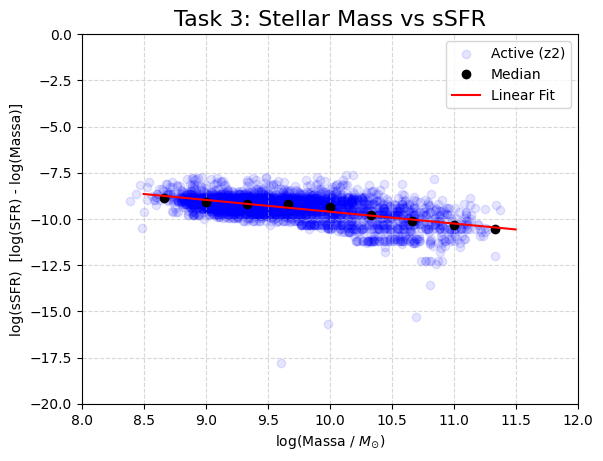

Slope: -0.639000017547291
Intercept: -3.214444222347452


In [ ]:
mass_bin_edges2 = np.linspace(8.5, 11.5, 10)

median_sfr2, bin_edges2, binnumber2 = binned_statistic(lmass_active_z2, lssfr_active_z2, statistic='median', bins = mass_bin_edges2)

bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2

popt, pcov = curve_fit(linear_func, bin_centers2, median_sfr2)

m_fit = popt[0]
b_fit = popt[1]

x_line = np.linspace(8.5, 11.5, 100)
y_line = linear_func(x_line, m_fit, b_fit)

plt.xlim(8,12)
plt.ylim(-20,0)

plt.scatter(lmass_active_z2, lssfr_active_z2,
            c='blue', alpha=0.1, label='Active (z2)')

plt.plot(bin_centers2, median_sfr2, 'o', color='black', label='Median')

plt.plot(x_line, y_line, color='red', label='Linear Fit')
plt.title('Task 3: Stellar Mass vs sSFR', fontsize=16)
plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


print(f"Slope: {m_fit}")
print(f"Intercept: {b_fit}")

<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3493378666.py:25: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


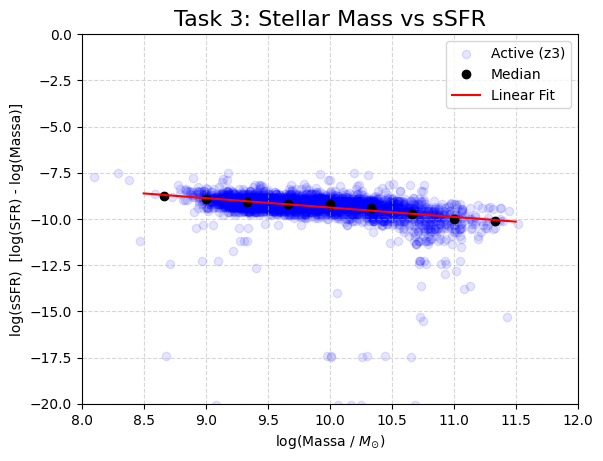

Slope: -0.5084999882430618
Intercept: -4.292222496077669


In [ ]:
mass_bin_edges3 = np.linspace(8.5, 11.5, 10)

median_sfr3, bin_edges3, binnumber3 = binned_statistic(lmass_active_z3, lssfr_active_z3, statistic='median', bins = mass_bin_edges3)

bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2

popt, pcov = curve_fit(linear_func, bin_centers3, median_sfr3)

m_fit = popt[0]
b_fit = popt[1]

x_line = np.linspace(8.5, 11.5, 100)
y_line = linear_func(x_line, m_fit, b_fit)

plt.xlim(8,12)
plt.ylim(-20,0)

plt.scatter(lmass_active_z3, lssfr_active_z3,
            c='blue', alpha=0.1, label='Active (z3)')

plt.plot(bin_centers3, median_sfr3, 'o', color='black', label='Median')

plt.plot(x_line, y_line, color='red', label='Linear Fit')
plt.title('Task 3: Stellar Mass vs sSFR', fontsize=16)
plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


print(f"Slope: {m_fit}")
print(f"Intercept: {b_fit}")

<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-120000570.py:25: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)')


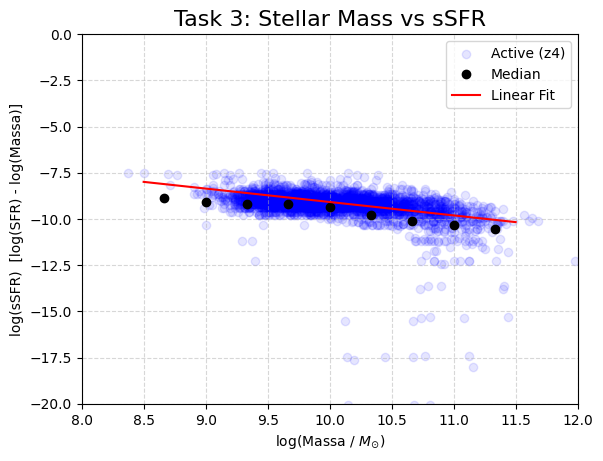

Slope: -0.725999675469864
Intercept: -1.8183365701575884


In [ ]:
mass_bin_edges4 = np.linspace(8.5, 11.5, 10)

median_sfr4, bin_edges4, binnumber4 = binned_statistic(lmass_active_z4, lssfr_active_z4, statistic='median', bins = mass_bin_edges4)

bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

popt, pcov = curve_fit(linear_func, bin_centers4, median_sfr4)

m_fit = popt[0]
b_fit = popt[1]

x_line = np.linspace(8.5, 11.5, 100)
y_line = linear_func(x_line, m_fit, b_fit)

plt.xlim(8,12)
plt.ylim(-20,0)

plt.scatter(lmass_active_z4, lssfr_active_z4,
            c='blue', alpha=0.1, label='Active (z4)')

plt.plot(bin_centers2, median_sfr2, 'o', color='black', label='Median')

plt.plot(x_line, y_line, color='red', label='Linear Fit')
plt.title('Task 3: Stellar Mass vs sSFR', fontsize=16)
plt.xlabel('log(Massa / $M_{\odot}$)')
plt.ylabel('log(sSFR)  [log(SFR) - log(Massa)]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


print(f"Slope: {m_fit}")
print(f"Intercept: {b_fit}")

In [ ]:
fit_params = {
    '0.83 (0-25%)': {'m': -0.64499, 'b': -3.27944},
    '1.16 (25-50%)': {'m': -0.63900, 'b': -3.21444},
    '1.66 (50-75%)': {'m': -0.50849, 'b': -4.29222},
    '3.00 (75-100%)': {'m': -0.72599, 'b': -1.81833}
}

log_mass_da_controllare = 10

print(f"Valore di log(sSFR) calcolato a log(Massa) = {log_mass_da_controllare}:")
for etichetta, parametri in fit_params.items():
    valore_sfr = linear_func(log_mass_da_controllare, parametri['m'], parametri['b'])
    print(f"Bin {etichetta}: {valore_sfr:.2f}")

Valore di log(sSFR) calcolato a log(Massa) = 10:
Bin 0.83 (0-25%): -9.73
Bin 1.16 (25-50%): -9.60
Bin 1.66 (50-75%): -9.38
Bin 3.00 (75-100%): -9.08


<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1000940921.py:33: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(Massa / $M_{\odot}$)', fontsize=12)


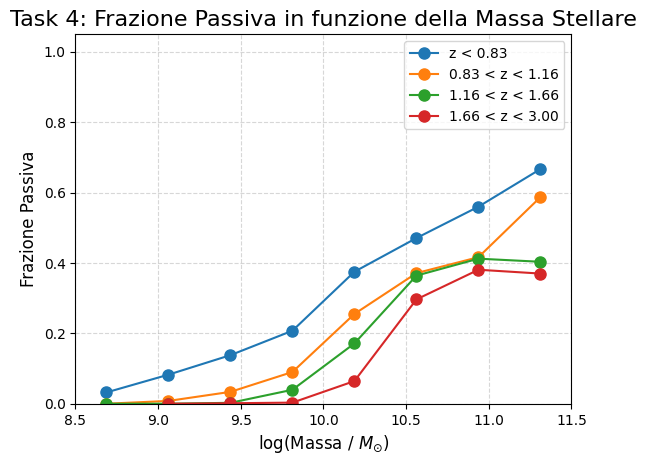

In [ ]:
z_bins = [z1, z2, z3, z4]
z_labels = [
    'z < 0.83',
    '0.83 < z < 1.16',
    '1.16 < z < 1.66',
    '1.66 < z < 3.00'
]

mass_bin_edges = np.linspace(8.5, 11.5, 9)
mass_bin_centers = (mass_bin_edges[:-1] + mass_bin_edges[1:]) / 2

for z_mask, label in zip(z_bins, z_labels):

    passive_fractions = []

    for i in range(len(mass_bin_edges) - 1):
        mass_mask = (table['lmass'] >= mass_bin_edges[i]) & (table['lmass'] < mass_bin_edges[i+1])
        total_in_bin_mask = z_mask & mass_mask
        passive_in_bin_mask = total_in_bin_mask & passive_mask
        n_total = np.sum(total_in_bin_mask)
        n_passive = np.sum(passive_in_bin_mask)
        if n_total > 10:
          fraction = n_passive / n_total
        else:
          fraction = np.nan
        passive_fractions.append(fraction)

    plt.plot(mass_bin_centers, passive_fractions, 'o-',
             label=label,
             markersize=8)

plt.title('Task 4: Frazione Passiva in funzione della Massa Stellare', fontsize=16)
plt.xlabel('log(Massa / $M_{\odot}$)', fontsize=12)
plt.ylabel('Frazione Passiva', fontsize=12)
plt.ylim(0, 1.05)
plt.xlim(8.5, 11.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
from astropy.table import Table

results = Table.read('/content/drive/MyDrive/Hands on Sessions/HoS3/5072_best_model.fits')
print(results.colnames)


['wavelength', 'Fnu', 'L_lambda_total', 'stellar.old', 'stellar.young', 'nebular.absorption_old', 'nebular.absorption_young', 'nebular.lines_old', 'nebular.lines_young', 'nebular.continuum_old', 'nebular.continuum_young', 'attenuation.stellar.old', 'attenuation.stellar.young', 'attenuation.nebular.lines_old', 'attenuation.nebular.lines_young', 'attenuation.nebular.continuum_old', 'attenuation.nebular.continuum_young', 'dust', 'igm']
